# Website 1

In [1]:
# Get article data
import requests
from bs4 import BeautifulSoup

URL = 'https://en.wikipedia.org/wiki/List_of_serial_killers_in_the_United_States'

page = requests.get(URL)
soup = BeautifulSoup(page.text, 'html5lib')

In [67]:
#print(soup.find('div', {'class' : 'mw-content-ltr mw-parser-output'}).get_text())

## Data Manipulation Steps for website 1
* Locating correct table by matching the headers since multiple tables on this page and general class chosen.
* Creating empty array
* Using a for loop to trace through the table looking for only killers whose victim count is greater than or equal to 4.
* Then storing as a dictionary to easily read

I am manipulating the data this way so I don't get all the columns of data, as the last few are paragraphs that don't translate to graphs, therefore I am getting rid of the noise data. I am left with the name of the serial killers, the years they were active, and how many proven victims they each have. This method allows me to easily extract the parts I need for future graphics.

In [19]:
tables = soup.find_all('table', class_='wikitable sortable')
# need to pull out the exact values needed from the first website

# Searching for my specific table, making sure first three header names match
for table in tables:
    ths = table.find_all('th')
    headings = [th.text.strip() for th in ths]
    if headings[:3] == ['Name','Years Active', 'Proven Victims']:
        break
data = []
for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    if not tds:
        continue
    name, years_active, proven_victims = [td.text.strip() for td in tds[:3]]
    # start = years_active.split('–')[0]  # if want to not show start and end year, just start year
    # need to remove any and all letters such as 's' and 'mid' from years_active
    start = years_active.replace('Mid', '').replace('s', '')
    if (int(proven_victims) >= 4):
        info = {'Name' : name, 'Years Active' : start, 'Proven Victims' : proven_victims}
        data.append(info)

# filter out any names whose victim count < 4
# data1 = [entry for entry in data if int(entry ['Proven Victims']) >= 4]

In [135]:
# Pickle the data to not scrap the website over and over

import pickle
with open ('article1.pkl', 'wb') as f:
    pickle.dump(data, f)


# Website 2

In [73]:
URL3 = 'https://www.worldatlas.com/crime/the-us-states-with-the-most-serial-killings.html#h_6780997095481704292206547'

import requests
from bs4 import BeautifulSoup

page3 = requests.get(URL3)
soup3 = BeautifulSoup(page3.text, 'html5lib')

TEXT3 = (soup3.find, 'div', {'class' : 'content_table'})

## Data Manipulation Steps for Website 2
* Use specific table id since given
* Create empty array
* Trace through table using 'tr's and 'td's from html source code.
* Store the three data fields wanted as a dictionary

I am manipulating the data this way to gather all the table information, as there are no extra columns like in the other website done above. I then stored as a dictionary to easily withdraw whatever parts I want for my graphics. I can then easily export the data and transfer to tableu for a more complex data representation.

In [90]:
# gather useable information from web scraping using specific id to locate correct table
tables2 = soup3.find('h2', id = 'h_6780997095481704292206547').find_next('table')

data3 = []
for tr in tables2.find_all('tr'):
    tds = tr.find_all('td')
    if not tds:
        continue
    rank, state, numberOfVictims = [td.text.strip() for td in tds[:3]]

    info2 = {'Rank' : rank, 'State' : state, 'Number of Victims' : numberOfVictims}
    data3.append(info2)
    

In [136]:
# dump to pickle file
import pickle
with open ('article3.pkl', 'wb') as f:
    pickle.dump(data3, f)

In [4]:
# read from article 3 pickled file to not rehit the api of the website
import pickle
with open('article3.pkl', 'rb') as f:
    art3 = pickle.load(f)

In [23]:
# To easily put in excel for tableau graphic
# Concatenate all ranks, states, and number of victims
ranks = '\n'.join(entry['Rank'] for entry in art3)
states = '\n'.join(entry['State'] for entry in art3)
victims = '\n'.join(entry['Number of Victims'] for entry in art3)

# Print the concatenated data
print("Rank\n" + ranks)
print("\nState\n" + states)
print("\nNumber of Victims\n" + victims)

Rank
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50

State
California
Texas
Florida
Illinois
New York
Ohio
Pennsylvania
Michigan
Georgia
Washington
Missouri
Indiana
Louisiana
North Carolina
Virginia
New Jersey
Maryland
Kentucky
Tennessee
Oklahoma
Massachusetts
Alabama
South Carolina
Arizona
Kansas
Oregon
Colorado
Arkansas
Connecticut
Wisconsin
Nevada
Mississippi
Utah
Nebraska
Minnesota
New Mexico
Alaska
Iowa
Montana
Idaho
West Virginia
Maine
Wyoming
Rhode Island
Delaware
New Hampshire
North Dakota
Hawaii
Vermont
South Dakota

Number of Victims
1,777
984
933
680
677
505
462
425
409
396
350
349
344
295
272
232
213
212
208
200
200
199
198
188
181
175
161
143
134
118
117
98
86
82
81
72
64
53
47
45
43
35
32
25
16
14
13
13
11
10


# Creating graphs of website 1

In [2]:
# read from article1 pickled file
import pickle
with open('article1.pkl', 'rb') as f:
    TEXT=pickle.load(f)

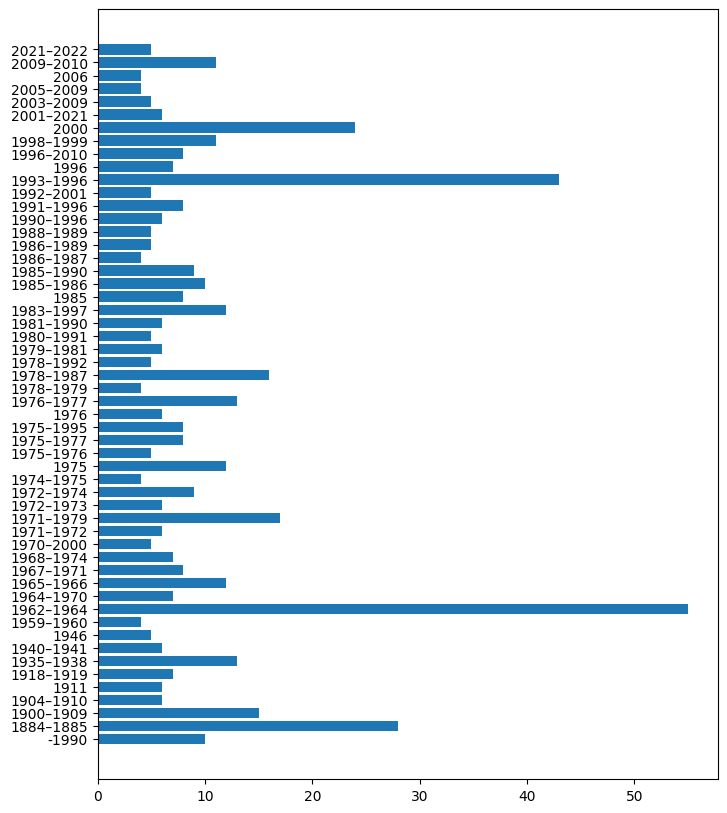

In [30]:
# need to redo --- want to trace through start years to know how many victims per year

import matplotlib.pyplot as plt

name = [entry['Name']for entry in TEXT]
victims = [int (entry['Proven Victims']) for entry in TEXT]
year = [entry['Years Active'] for entry in TEXT]

plt.figure(figsize=(8, 10)) # to make graph large enough for y=labels to not overlap
plt.title('')
plt.barh(sorted(year), victims)
#plt.xticks(rotation = 90)
plt.show()

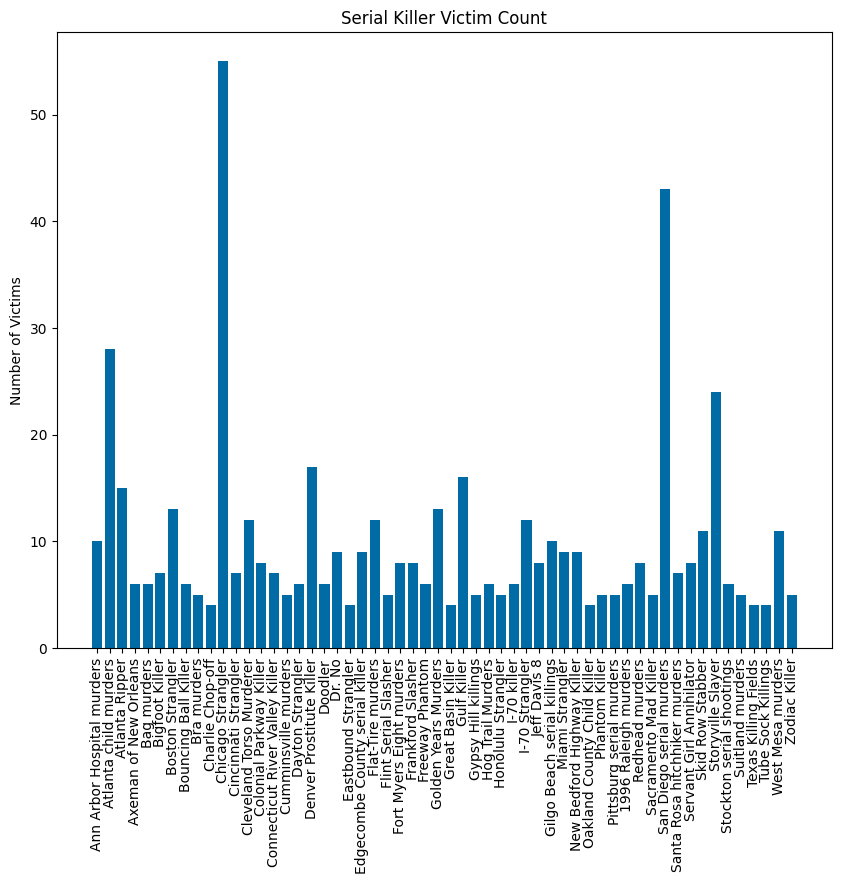

In [125]:
import matplotlib.pyplot as plt

name = [entry['Name']for entry in TEXT]
victims = [int (entry['Proven Victims']) for entry in TEXT]
year = [entry['Years Active'] for entry in TEXT]

plt.figure(figsize=(10, 8))
plt.title('Serial Killer Victim Count')
plt.ylabel('Number of Victims')
plt.bar(name, victims)
plt.xticks(rotation = 90)
plt.show()

# Potential graph for final

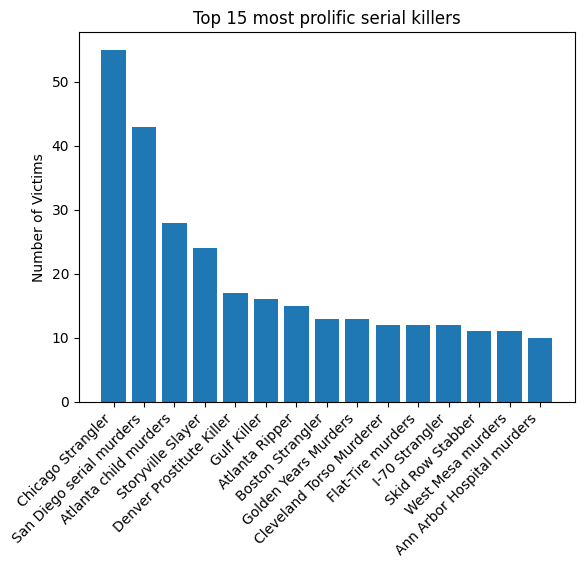

In [22]:
# Top serial killers
import matplotlib.pyplot as plt

#sort by victims
top = sorted(TEXT, key = lambda x : int(x['Proven Victims']), reverse = True)
top_15 = top[:15]

name = [entry['Name']for entry in top_15]
victims = [int (entry['Proven Victims']) for entry in top_15]
year = [entry['Years Active'] for entry in top_15]

#plt.figure(figsize=(10, 8))
plt.title('Top 15 most prolific serial killers')
plt.ylabel('Number of Victims')
plt.bar(name, victims)
plt.xticks(rotation = 45, ha='right')
plt.show()

# graphs of website 3 - Used tableau for chloropleth map

In [5]:
import matplotlib.pyplot as plt

rank = [int(entry['Rank'])for entry in art3]
state = [entry['State'] for entry in art3]
numberOfVictims = [int(entry['Number of Victims'].replace(',', '')) for entry in art3]

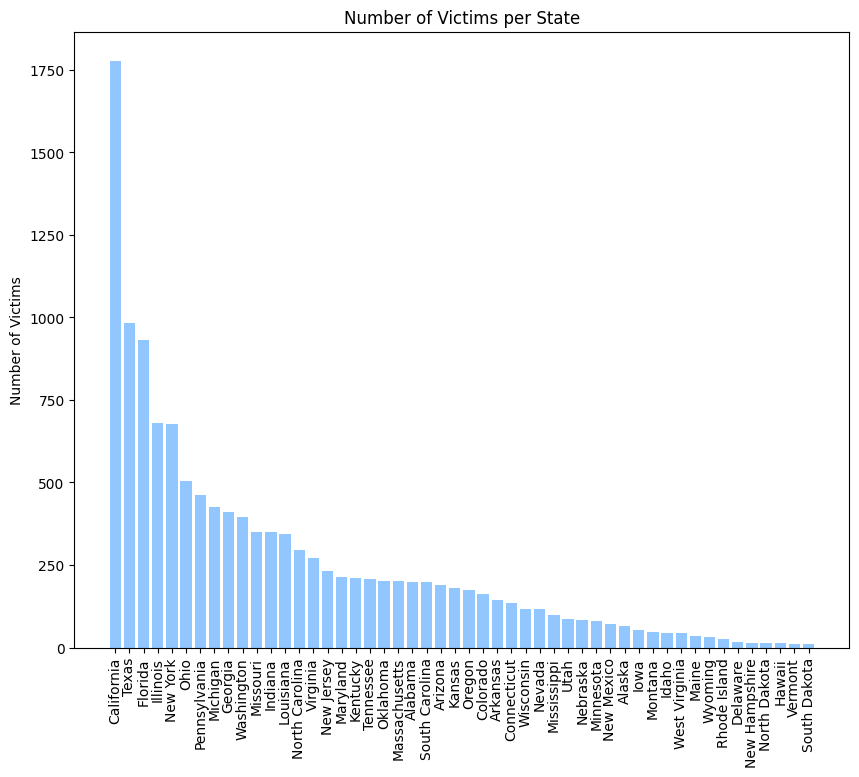

In [133]:
import matplotlib.style as style
style.use('tableau-colorblind10')
style.use('seaborn-v0_8-pastel')

plt.figure(figsize=(10, 8))
plt.bar(state, numberOfVictims)
plt.title('Number of Victims per State')
plt.ylabel('Number of Victims')
plt.xticks(rotation = 90)
plt.show()